In [335]:
import mysql.connector
import pandas as pd
import numpy as np
#import seaborn as sns
#import requests
#import json
import datetime as dt
#import time
import matplotlib.pyplot as plt

In [336]:
# connect to mysql
cnx = mysql.connector.connect(user='nba_user', password='letmein',
                              host='127.0.0.1',
                              database='nba_data')
cursor = cnx.cursor()

In [337]:
# call table from MySQL
sql = "SELECT * FROM nba;"

cursor.execute(sql)
rows = cursor.fetchall();

In [338]:
column_names = ['game_time', 'game_date', 'arena', 'home_team', 'home_wins', 
                'home_losses', 'away_team', 'away_wins', 'away_losses', 'attendance']

In [339]:
# create dataframe
features = pd.DataFrame(rows, columns=column_names)

In [340]:
features.to_csv('NBA_data.csv')

In [341]:
features.drop(columns='game_time', inplace=True)

In [342]:
features.head(5)

,game_date,arena,home_team,home_wins,home_losses,away_team,away_wins,away_losses,attendance
0,2017-10-17,Quicken Loans Arena,Cleveland Cavaliers,1,0,Boston Celtics,0,1,20562
1,2017-10-17,Oracle Arena,Golden State Warriors,0,1,Houston Rockets,1,0,19596
2,2017-10-18,TD Garden,Boston Celtics,0,2,Milwaukee Bucks,1,0,18624
3,2017-10-18,American Airlines Center,Dallas Mavericks,0,1,Atlanta Hawks,1,0,19709
4,2017-10-18,Little Caesars Arena,Detroit Pistons,1,0,Charlotte Hornets,0,1,20491


In [343]:
# limit to categorical data using df.select_dtypes()
#X = features.select_dtypes(include=[object])
#X.head(10)

In [344]:
features['game_date'] = pd.to_datetime(features['game_date'])

In [345]:
#features['weekday'] = features['game_date'].dt.strftime('%A')

In [346]:
#features['game_date'] = features['game_date'].map(dt.datetime.toordinal)

In [347]:
features.game_date.dtype

dtype('<M8[ns]')

In [348]:
# Create new columns for day, month, year, and day of the week
features['day'] = features['game_date'].dt.day
features['month'] = features['game_date'].dt.month
features['year'] = features['game_date'].dt.year
features['weekday'] = features['game_date'].dt.strftime('%A')
features.drop(columns='game_date', inplace=True)

In [349]:
# One-hot encode the data using pandas get_dummies
features = pd.get_dummies(features)
# Display the first 5 rows
features.head(5)

,home_wins,home_losses,away_wins,away_losses,attendance,day,month,year,arena_AT&T Center,arena_AccorHotels Arena,...,away_team_Toronto Raptors,away_team_Utah Jazz,away_team_Washington Wizards,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,1,0,0,1,20562,17,10,2017,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,1,0,19596,17,10,2017,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2,1,0,18624,18,10,2017,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,1,0,19709,18,10,2017,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,1,20491,18,10,2017,0,0,...,0,0,0,0,0,0,0,0,0,1


In [351]:
# Labels are the values we want to predict
labels = np.array(features['attendance'])

# Remove the labels from the features
# axis 1 refers to the columns
features = features.drop('attendance', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

In [352]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 69)

In [353]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (4386, 120)
Training Labels Shape: (4386,)
Testing Features Shape: (1463, 120)
Testing Labels Shape: (1463,)


In [354]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 69)

# Train the model on training data
rf.fit(train_features, train_labels);

In [355]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 808.04


In [356]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 95.02 %.


In [357]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
# [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

In [ ]:
#conda install pydot-ng

In [359]:
#conda install graphviz

In [360]:
#import os
#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [361]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
# graph.write_png('tree.png')

In [362]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)

# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
#graph.write_png('small_tree.png');

In [363]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
# [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

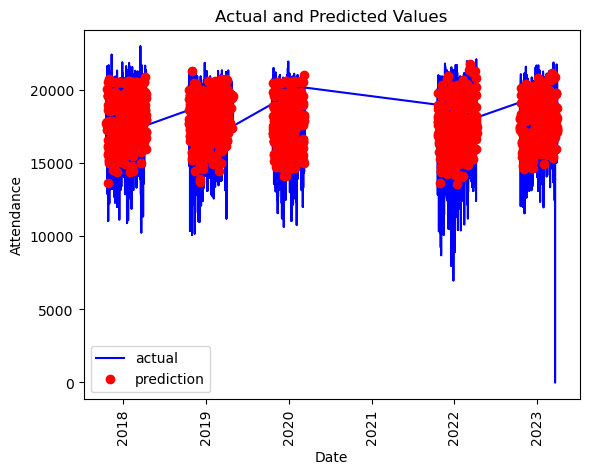

In [364]:
# Use datetime for creating date objects for plotting
import datetime
# Dates of training values
months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]
# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})
# Dates of predictions
months = test_features[:, feature_list.index('month')]
days = test_features[:, feature_list.index('day')]
years = test_features[:, feature_list.index('year')]
# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]
# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})
# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = 'vertical'); 
plt.legend()
# Graph labels
plt.xlabel('Date'); plt.ylabel('Attendance'); plt.title('Actual and Predicted Values');

In [365]:
#import packages for linear regression
from sklearn.linear_model import LinearRegression

#create variables for regression
y = labels
X = features

In [366]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [367]:
# Create a linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

LinearRegression()

In [368]:
# Use the regression's predict method on the test data
y_pred = model.predict(X_test)

# Calculate the absolute errors
errors_reg = abs(y_pred - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors_reg), 2))

Mean Absolute Error: 78894724151.53


In [369]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', round(mae, 2))

Mean Absolute Error: 78894724151.53


In [370]:
from sklearn.metrics import mean_absolute_percentage_error

#Calculate MAPE
mape_reg = mean_absolute_percentage_error(y_test, y_pred)
print(mape_reg)

4479525.980992457


In [371]:
acc_reg = 100 - mape_reg
print('Accuracy:', round(acc_reg, 2), '%.')

Accuracy: -4479425.98 %.


In [372]:
# Calculate mean absolute percentage error (MAPE)
mape_reg = 100 * (errors_reg / y_test)
print(mape_reg)

# Calculate and display accuracy
accuracy_reg = 100 - np.mean(mape_reg)
print('Accuracy:', round(accuracy_reg, 2), '%.')

[ 3.79157225 11.50971715  4.18350356 ...  0.22378907  0.96823518
  2.73781482]
Accuracy: -447952498.1 %.


In [373]:
## upload MLP packages from sklearn
#from sklearn.neural_network import MLPClassifier
#from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Load your data
## X is the feature matrix (independent variables)
## y is the target variable (dependent variable)

##create variables for MLP
#Y = labels
#x = features

## Split the data into training and testing sets
#x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state=69)

## Perform feature scaling on the training and testing sets
#scaler = StandardScaler()
#x_train_scaled = scaler.fit_transform(x_train)
#x_test_scaled = scaler.transform(x_test)

## Create an MLPClassifier instance
#mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', random_state=69)

## Train the MLP model
#mlp.fit(x_train_scaled, Y_train)

## Make predictions on the testing set
#Y_pred = mlp.predict(x_test_scaled)

## Evaluate the model
#accuracy_mlp = accuracy_score(Y_test, Y_pred)
#precision = precision_score(Y_test, Y_pred, average='macro')
#recall = recall_score(Y_test, Y_pred, average='macro')
#f1 = f1_score(Y_test, Y_pred, average='macro')

#print('Accuracy:', accuracy_mlp)
#print('Precision:', precision)
#print('Recall:', recall)
#print('F1-score:', f1)